## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [13]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [14]:
train, test = keras.datasets.cifar10.load_data()

In [15]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [16]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [17]:
from keras.regularizers import l1, l2, l1_l2


def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [18]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [19]:
results = {}

for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updati

50000/50000 [==============================] - 3s 54us/step - loss: 2.4626 - acc: 0.0966 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.4626 - acc: 0.0984 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.4626 - acc: 0.0970 - val_loss: 2.4625 - val_acc: 0.1000s - loss
Epoch 50/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.4626 - acc: 0.0984 - val_loss: 2.4626 - val_acc: 0.1000 loss: 2.4626 -
Experiment with Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidd

50000/50000 [==============================] - 3s 54us/step - loss: 2.7437 - acc: 0.6266 - val_loss: 3.0428 - val_acc: 0.5277
Epoch 48/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.7100 - acc: 0.6267 - val_loss: 2.9768 - val_acc: 0.5313
Epoch 49/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.6717 - acc: 0.6301 - val_loss: 3.1123 - val_acc: 0.4916
Epoch 50/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.6325 - acc: 0.6328 - val_loss: 2.9261 - val_acc: 0.5293
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)      

50000/50000 [==============================] - 3s 54us/step - loss: 0.9004 - acc: 0.6862 - val_loss: 1.3867 - val_acc: 0.5301
Epoch 49/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.8902 - acc: 0.6882 - val_loss: 1.5821 - val_acc: 0.4841
Epoch 50/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.8818 - acc: 0.6928 - val_loss: 1.4316 - val_acc: 0.5260
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (Non

50000/50000 [==============================] - 3s 54us/step - loss: 0.8845 - acc: 0.6887 - val_loss: 1.3603 - val_acc: 0.5358
Epoch 50/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.8725 - acc: 0.6926 - val_loss: 1.3980 - val_acc: 0.5245


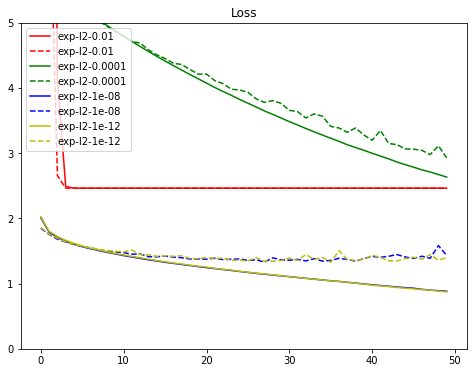

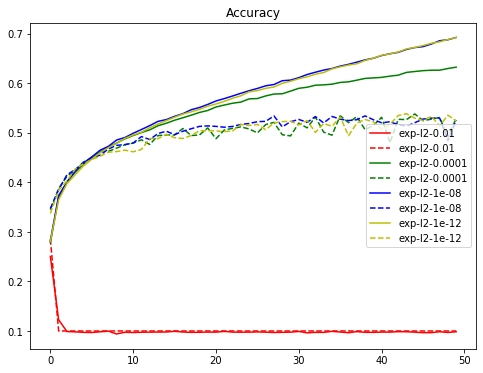

In [20]:
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [21]:
def build_mlp2(input_shape, output_units=10, num_neurons=[512, 256, 128], l12_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l12_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l12_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [22]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L12_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [23]:
results = {}

for regulizer_ratio in L12_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp2(input_shape=x_train.shape[1:], l12_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 67us/step - loss: 18.8282 - acc: 0.2640 - val_loss: 17.3788 - val_acc: 0.3376
Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 16.1586 - acc: 0.3577 - val_loss: 14.9973 - val_acc: 0.3635
Epoch 3/50
50000/50000 [==============================] - 3s 58us/step - loss: 13.9696 - acc: 0.3810 - val_loss: 12.9863 - val_acc: 0.3881
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 12.1173 - acc: 0.3937 - val_loss: 11.2826 - val_acc: 0.3936
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 10.5448 - acc: 0.4051 - val_loss: 9.8333 - val_acc: 0.4063
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 9.2062 - acc: 0.4110 - val_loss: 8.5991 - val_acc: 0.4111
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 8.0655 - acc: 0.4166 - val_loss: 7.5525 

50000/50000 [==============================] - 3s 66us/step - loss: 15.1047 - acc: 0.2746 - val_loss: 13.9745 - val_acc: 0.3302ss: 1
Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 13.0393 - acc: 0.3603 - val_loss: 12.1448 - val_acc: 0.3735
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 11.3640 - acc: 0.3828 - val_loss: 10.6127 - val_acc: 0.3911
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 9.9497 - acc: 0.3962 - val_loss: 9.3209 - val_acc: 0.3934
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 8.7477 - acc: 0.4068 - val_loss: 8.2076 - val_acc: 0.40948128 - acc: 0
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 7.7236 - acc: 0.4136 - val_loss: 7.2584 - val_acc: 0.4193
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 6.8498 - acc: 0.4209 - val_loss: 6.4540 - val_acc: 0.4188
Epoch 8/50
50000/50000 [====

50000/50000 [==============================] - 3s 67us/step - loss: 15.0965 - acc: 0.2829 - val_loss: 13.9708 - val_acc: 0.3383
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 13.0332 - acc: 0.3637 - val_loss: 12.1423 - val_acc: 0.3699
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 11.3554 - acc: 0.3868 - val_loss: 10.6057 - val_acc: 0.4014
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 9.9410 - acc: 0.4016 - val_loss: 9.3017 - val_acc: 0.4101
Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 8.7389 - acc: 0.4104 - val_loss: 8.1985 - val_acc: 0.4126
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 7.7141 - acc: 0.4174 - val_loss: 7.2517 - val_acc: 0.4222
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 6.8406 - acc: 0.4239 - val_loss: 6.4467 - val_acc: 0.4259
Epoch 8/50
50000/50000 [======================

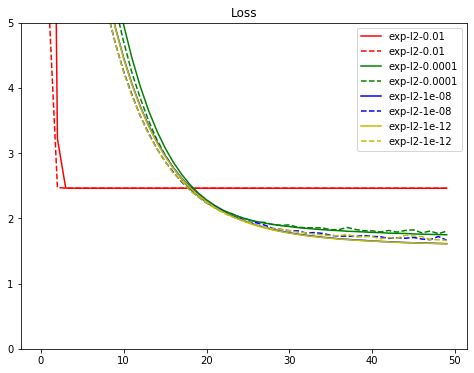

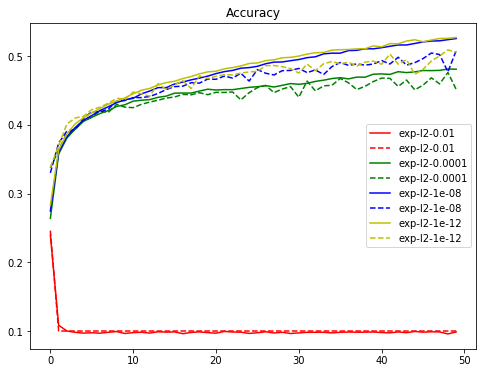

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()